# Brain connectivities

Provides tools for visualizing brain connectivities using circular diagrams (circos plots), enabling intuitive exploration of inter- and intra-hemispheric connectivity between EEG channels or grouped anatomical regions.

In [1]:
from dunderlab.visualizations.series import plot_eeg
%%capture
pip install -U git+https://github.com/dunderlab/python-dunderlab.visualizations.git

<div class="alert alert-info">Note

_Colab_ users must ensure to install _matplotlib_ via _apt-get_ with the following command:
```!apt-get install python3-matplotlib```

</div>

In [61]:
from dunderlab.visualizations.connectivities import CircosConnectivity, interact_connectivity
import numpy as np
from matplotlib import pyplot as plt

### Channels used in connectivity mapping

The following list defines the EEG channels (electrodes) that will serve as nodes in the circular connectivity diagram. Each element corresponds to a specific scalp location, and their order must match the structure of the connectivity matrix.

These channels are assumed to represent bilateral anatomical positions, allowing clear visualization of inter- and intra-hemispheric connections:

In [3]:
channels = ['Fp2', 'C4', 'T4', 'T6', 'O2', 'O1', 'T3', 'T5', 'C3', 'Fp1']

The list must be consistent with any anatomical grouping (e.g., `areas` dictionary) or montage reference used later in the plot. Proper ordering is essential to preserve the spatial and anatomical logic of the circular layout.

### Anatomical areas for electrode grouping

The `areas` dictionary is used to define logical groupings of EEG channels into broader anatomical or functional regions. These groupings enable hierarchical labeling and visualization, allowing the circos plot to represent both fine-grained (per-channel) and coarse-grained (per-region) connectivity patterns.

Each key in the dictionary represents a named region (e.g., "Frontal", "Occipital"), and its corresponding value is a list of channels (electrodes) that belong to that region:

In [4]:
areas = {
    'Frontal': ['Fp2'],
    'Central': ['C4'],
    'Temporal': ['T4', 'T6'],
    'Occipital': ['O2'],

    'Occipital_': ['O1'],
    'Temporal_': ['T5', 'T3'],
    'Central_': ['C3'],
    'Frontal_': ['Fp1'],
}

These labels can be used to define hemispheric distinctions by suffix (e.g., `_` for left hemisphere) or any other logical grouping relevant to the experimental context. The area definitions should be **mutually exclusive** and **collectively exhaustive** with respect to the `channels` list.

### Non-directional connectivities: upper-triangular representation

In the case of non-directional (symmetric) connectivity matrices—such as correlation, coherence, or mutual information—only the **upper-triangular part** of the matrix is needed to represent all unique connections, excluding self-connections (diagonal).

The following code directly generates a vector of random values corresponding to the upper-triangular entries of a symmetric matrix, excluding the diagonal:


In [5]:
N = len(channels)  # number of EEG channels

# Compute the number of unique undirected connections
n_connections = N * (N - 1) // 2

# Generate random connectivity values as a 1D vector
np.random.seed(0)
connectivities_v = np.random.normal(size=n_connections) * 100

This vector `connectivities_v` contains all unique undirected connections and can be used as input to `CircosConnectivity` when the `connectivities` parameter expects a 1D structure.

**Note:** The length of the resulting vector is `N*(N−1)/2`.

### Interactive widget for Circos plot configuration

To facilitate the exploration and customization of connectivity visualizations, the function `interact_connectivity(...)` provides an interactive widget interface that allows real-time adjustment of multiple parameters of the `CircosConnectivity` object.

#### Parameters:
- `connectivities_v`: a 1D vector encoding the upper-triangular values of a symmetric connectivity matrix (excluding the diagonal).
- `channels`: list of EEG channel names corresponding to the nodes in the diagram.
- `areas`: dictionary grouping channels by anatomical or functional region (e.g., `'Frontal': ['Fp1', 'Fp2']`).

#### Features enabled by the widget:
- Threshold filtering (`threshold`)
- Colormap selection (`areas_cmap`, `arcs_cmap`)
- Dynamic control of arc geometry (e.g., `connection_width`, `arcs_separation_src/dst`)
- Label styling (`width`, `text`, `labelsize`, `labelposition`, etc.)
- Hemisphere rendering toggle (`show_emisphere`)
- Arrowhead styling (`arrowhead_width`, `arrowhead_length`)
- Limiting number of visible connections (`limit_connections`)

#### Output:
- A fully configured and rendered `CircosConnectivity` figure, updated in real-time as parameters change.
- The `conn` variable holds the last rendered object and gives access to methods such as:

This tool is ideal for fine-tuning aesthetic and structural aspects of circos-based brain connectivity diagrams in exploratory data analysis.

You can instantiate it with:

In [6]:
conn = interact_connectivity(connectivities_v, channels, areas)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), IntSlider(value=-1, descriptio…

### Saving and reusing CircosConnectivity configurations

Once an interactive plot has been configured using the `interact_connectivity(...)` interface, the full set of visualization parameters can be accessed using:

~~~python
configurations = conn.params
~~~

This returns a dictionary containing all current settings used to generate the `CircosConnectivity` instance, including:

- Thresholds and limits (`threshold`, `limit_connections`)
- Colormaps and colors (`areas_cmap`, `arcs_cmap`, `hemisphere_color`, `channel_color`)
- Label geometry (`width`, `text`, `separation`, `labelposition`, `size`, `labelsize`)
- Arcs and arrow properties (`connection_width`, `arcs_separation_src`, `arcs_separation_dst`, `arrowhead_width`, `arrowhead_length`)
- Shape and layout parameters (`show_emisphere`, `offset`, etc.)

#### Reusing configurations

You can reapply the same configuration later (e.g., in another notebook or script) by simply calling:

~~~python
conn = CircosConnectivity(connectivities_v, channels, areas, **configurations)
~~~

This allows for:
- Reproducibility of visualizations.
- Easy sharing of layout presets.
- Batch generation of plots using the same visual style.

#### Optional: Saving configurations to file

To persist the configuration, you can serialize it using:

~~~python
import json

with open("circos_config.json", "w") as f:
    json.dump(configurations, f, indent=4)
~~~

And later restore it via:

~~~python
with open("circos_config.json", "r") as f:
    configurations = json.load(f)

conn = CircosConnectivity(connectivities_v, channels, areas, **configurations)
~~~

This feature is ideal for creating consistent figures across reports or datasets.

In [9]:
configurations = conn().params
configurations

{'threshold': 0.0,
 'limit_connections': -1,
 'percentile': [95, 100],
 'normalize_colors': True,
 'areas_cmap': 'Set3',
 'arcs_cmap': 'viridis',
 'hemisphere_color': 'lightgray',
 'channel_color': '#f8f9fa',
 'width': {'hemispheres': 35, 'areas': 100, 'channels': 60},
 'text': {'hemispheres': 40, 'areas': 20, 'channels': 40},
 'separation': {'hemispheres': 10, 'areas': -30, 'channels': 5},
 'labelposition': {'hemispheres': 60, 'areas': 0, 'channels': -10},
 'size': 10,
 'labelsize': 15,
 'show_emisphere': True,
 'connection_width': 0.09999999999999999,
 'small_separation': 5,
 'big_separation': 10,
 'offset': 0,
 'arcs_separation_src': 30,
 'arcs_separation_dst': 30,
 'arrowhead_width': 0.05,
 'arrowhead_length': 30,
 'arrow_max_width': 10}

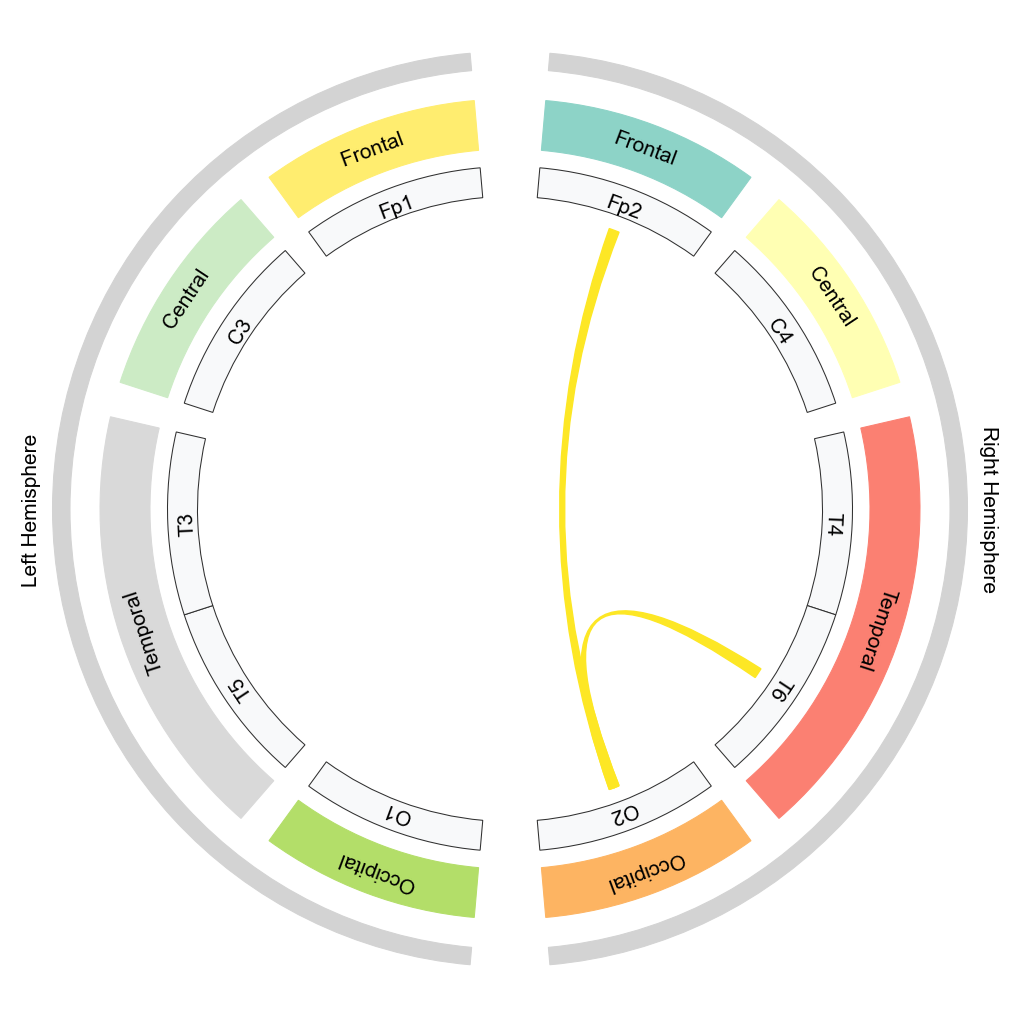

In [10]:
CircosConnectivity(connectivities_v, channels, areas, **configurations)

### Alternative grouping example for anatomical areas

In this example, we define a different set of `areas` to illustrate how flexible the grouping of EEG channels can be, depending on the focus of the analysis.

In [12]:
areas_cross = {
    'Frontal': ['Fp1', 'Fp2'],
    'Central': ['C4'],
    'Temporal': ['T4', 'T6'],
    'Occipital': ['O2', 'O1'],
    'Temporal_': ['T5', 'T3'],
    'Central_': ['C3'],
}

#### What's different?

Compared to the previous example, where areas were defined with explicit **hemispheric labeling** (e.g., `'Frontal'` vs `'Frontal_'`), this alternative:

- Merges **both hemispheres** into single regional labels like `'Frontal'` and `'Occipital'`, combining left and right channels into unified groups.
- Uses only one `'Central_'` label instead of both `'Central'` and `'Central_'`, simplifying the structure.
- May be more suitable for **cross-hemispheric plots** or when a hemispheric distinction is not the main concern.

#### Example usage

This will render a circular diagram where connections are grouped according to the revised area mapping, which influences the arc grouping, label arrangement, and inter-region connectivity representation.

Such flexibility is particularly valuable when comparing inter-regional interactions under different cognitive or clinical conditions.

In [13]:
conn_cross = interact_connectivity(connectivities_v, channels, areas_cross, offset_=-1)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), IntSlider(value=-1, descriptio…

### Topoplot reference: Electrode spatial layout

The method `conn.topoplot_reference(...)` provides a scalp map that shows the standard electrode positions used in the circular connectivity plot. This reference is useful for interpreting the spatial arrangement of channels within the brain topology.

It leverages standard EEG montages to render a 2D projection of the electrode layout.

#### Example usage:

~~~python
conn.topoplot_reference(
    montage_name='standard_1005',
    size=10,
    fontsize=20,
    markersize=40,
    markerfacecolor='#ffffff88',
    markeredgecolor='#000000',
)
~~~

#### Parameters:

- `montage_name`: string
  Name of the EEG montage to load (e.g., `'standard_1005'`, `'biosemi64'`, `'standard_1020'`). Must be recognized by MNE-Python.

- `size`: int
  Size of the figure (in inches).

- `fontsize`: int
  Font size for the channel labels.

- `markersize`: int
  Diameter of the circular markers representing each electrode.

- `markerfacecolor`: str (HTML hex or RGBA)
  Fill color of the electrode markers.

- `markeredgecolor`: str
  Outline color of the electrode markers.

#### Output:

- A matplotlib figure with the topographic projection of the EEG electrodes used in the circular plot.

This visualization supports the anatomical interpretation of connectivity results by linking the abstract circular representation with the actual electrode positions on the scalp.

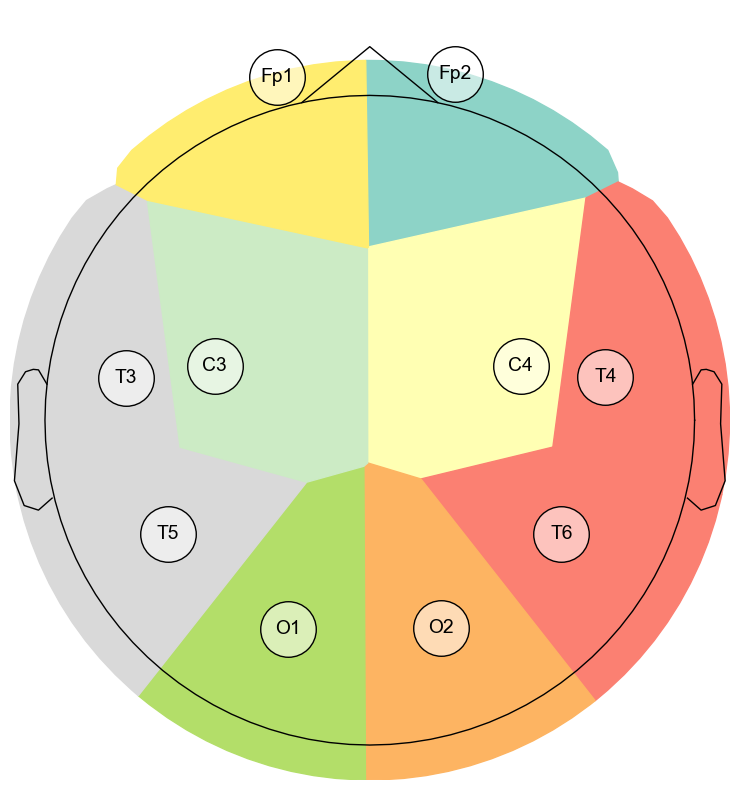

In [16]:
conn().topoplot_reference(
    montage_name='standard_1005',
    size=10,
    fontsize=20,
    markersize=40,
    markerfacecolor='#ffffff88',
    markeredgecolor='#000000',
);

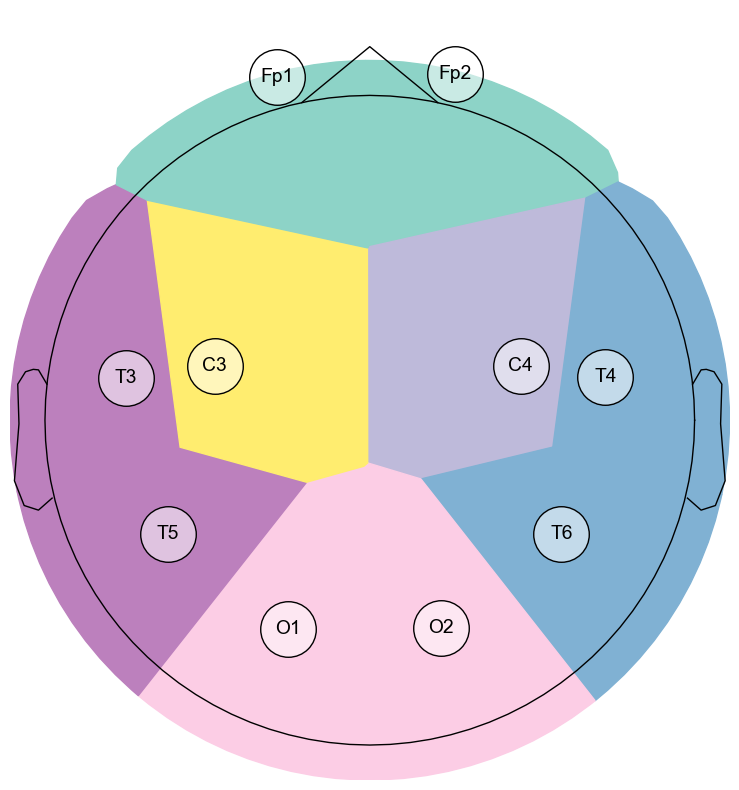

In [18]:
conn_cross().topoplot_reference(
    montage_name='standard_1005',
    size=10,
    fontsize=20,
    markersize=40,
    markerfacecolor='#ffffff88',
    markeredgecolor='#000000',
);

### Directional connectivities: full matrix representation

In contrast to symmetric (non-directional) connectivities, some metrics—such as Granger causality, transfer entropy, or phase slope index—yield **directional interactions**, where the influence from channel *i* to *j* may differ from *j* to *i*.

In such cases, the full **square connectivity matrix** must be provided as input, preserving directionality.

#### Key differences with non-directional input:

- The input must be a 2D NumPy array of shape **(N, N)**.
- Both upper and lower triangular parts are relevant.
- The plot will show **directional arcs**, typically using arrows to indicate source → target flow.
- If `connectivities[i, j] > connectivities[j, i]`, the arc is biased from *

In [27]:
connectivities_square = np.random.normal(size=(N, N))
conn_dir = interact_connectivity(connectivities_square, channels, areas)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), IntSlider(value=-1, descriptio…

In [55]:
arguments  = conn_dir().params
arguments

{'threshold': 0.0,
 'limit_connections': -1,
 'percentile': [25, 75],
 'normalize_colors': True,
 'areas_cmap': 'Set3',
 'arcs_cmap': 'Wistia',
 'hemisphere_color': 'lightgray',
 'channel_color': '#f8f9fa',
 'width': {'hemispheres': 35, 'areas': 100, 'channels': 60},
 'text': {'hemispheres': 40, 'areas': 20, 'channels': 40},
 'separation': {'hemispheres': 10, 'areas': -30, 'channels': 5},
 'labelposition': {'hemispheres': 60, 'areas': 0, 'channels': -10},
 'size': 10,
 'labelsize': 15,
 'show_emisphere': True,
 'connection_width': 0.09999999999999999,
 'small_separation': 5,
 'big_separation': 10,
 'offset': 0,
 'arcs_separation_src': 30,
 'arcs_separation_dst': 69,
 'arrowhead_width': 0.05,
 'arrowhead_length': 30,
 'arrow_max_width': 10}

### Connections Filtering Criteria

To enhance interpretability in dense connectivity diagrams, the `CircosConnectivity` class provides advanced filtering options to selectively display only the most relevant connections. These filters apply *before* rendering and control which directional arcs are shown based on quantitative and statistical thresholds.

#### Available Filters:

- **`threshold`**: Minimum strength required for a connection to be displayed. Any arc with a value below this threshold is omitted. Useful for removing weak or noisy interactions.

- **`limit_connections`**: Maximum number of connections to render. Only the top `n` strongest connections (after applying `threshold` and `percentile` filters) are kept. This allows focus on the most dominant interactions.

- **`percentile`**: Range-based filter that retains only connections falling within the specified percentile interval of the distribution (e.g., `[25, 75]` retains mid-strength values). Helps highlight medium or extreme interactions depending on context.

#### Filtering Behavior:

- Filters are applied in the following order: `threshold` → `percentile` → `limit_connections`.
- When **`normalize_colors=True`**, the visual strength of arrows is scaled across the remaining subset, not the full matrix.
- These filters apply **per direction** in asymmetric matrices. That is, connection from *A → B* is evaluated separately from *B → A*.

#### Example:

To plot only the top 10% of directional connections with strength above `0.3`:

```python
CircosConnectivity(
    connectivities,
    channels,
    areas,
    threshold=0.3,
    percentile=[80, 100],
    limit_connections=-1
)

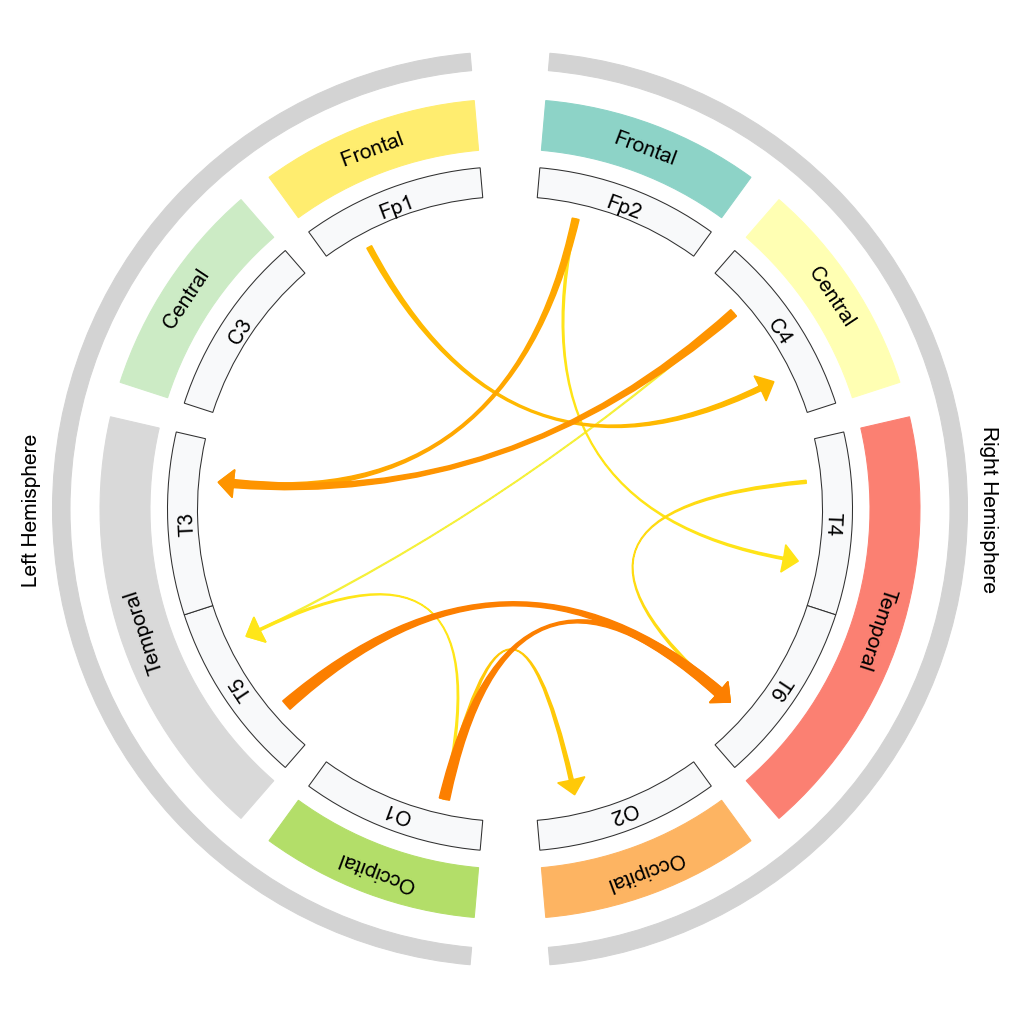

In [56]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold': 0.7,
    'percentile': [80, 100],
})
CircosConnectivity(connectivities_square, channels, areas, **arguments_)

#### Example:

To plot **only the 20 strongest directional connections**, regardless of percentile or absolute strength:

```python
CircosConnectivity(
    connectivities,
    channels,
    areas,
    limit_connections=20,
    threshold=0.0,            # Optional: keep all values >= 0
    percentile=None,          # Optional: ignore percentile filtering
)

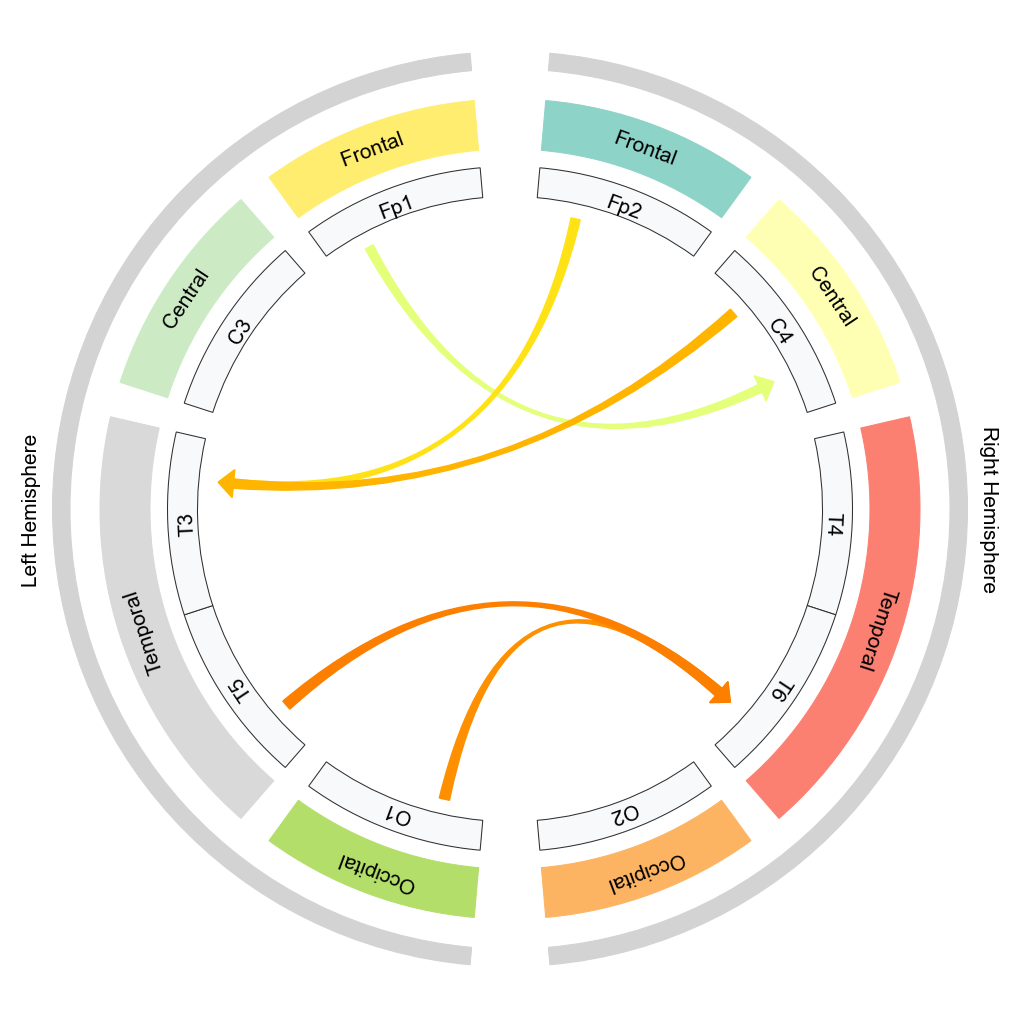

In [57]:
arguments_ = arguments.copy()
arguments_.update({
    'limit_connections': 5,
    'percentile': None,
})
CircosConnectivity(connectivities_square, channels, areas, **arguments_)

### Color Normalization (`normalize_colors`)

The `normalize_colors` argument controls how the strength of each connection is visually mapped to color intensity in the arcs or arrows of the `CircosConnectivity` plot.

#### Purpose:
By default, connection strengths are translated into color using a colormap (e.g., `viridis`, `Wistia`) where higher values appear more saturated. When filtering is applied (e.g., by `threshold` or `percentile`), the full value range may shrink, potentially reducing contrast and interpretability.

#### Behavior:

- **`normalize_colors=True`** *(default)*:
  - Colors are normalized **relative to the filtered subset** of connections.
  - Enhances contrast among the visible connections.
  - Recommended when using filtering, as it avoids visual flattening.


- **`normalize_colors=False`**:
  - Colors are normalized using the **original full matrix** (including excluded or invisible connections).
  - Ensures global consistency across multiple plots.
  - Useful for comparing several figures where color meaning should remain constant.

###  Example: Comparing Low vs. High Percentile Connections
The following examples illustrate how the `percentile` filter can be used to selectively visualize subsets of connections based on their relative strength within the connectivity matrix.
**Common configuration**:
- `threshold=0`: All values ≥ 0 are considered.
- `normalize_colors=False`: Global color normalization for consistent scale comparison.
- `arcs_cmap='viridis'`: Ensures perceptual uniformity in visual encoding.

**Low Percentile Connections** `[0, 50]`

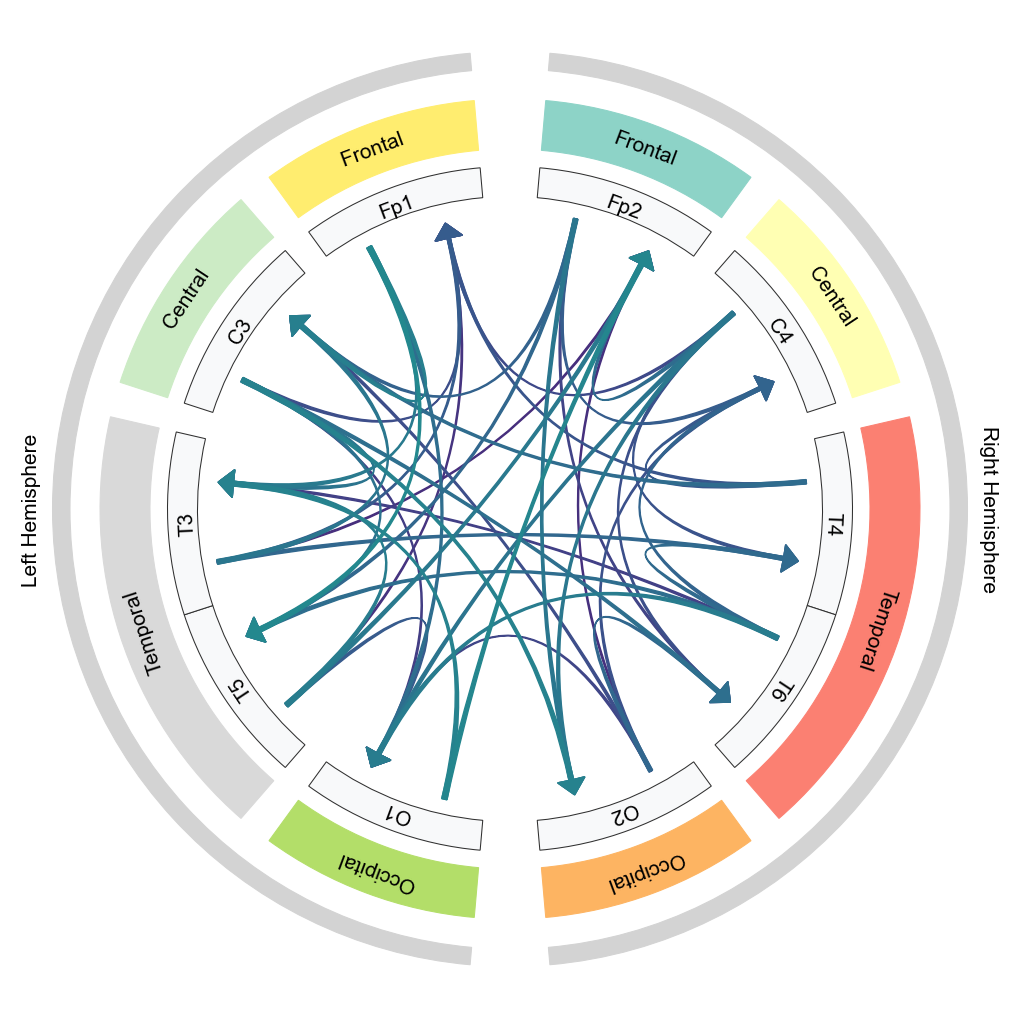

In [72]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold': 0,
    'percentile': [0, 50],
    'normalize_colors': False,
    'arcs_cmap': 'viridis',
})
CircosConnectivity(connectivities_square, channels, areas, **arguments_);

**High Percentile Connections** `[50, 100]`

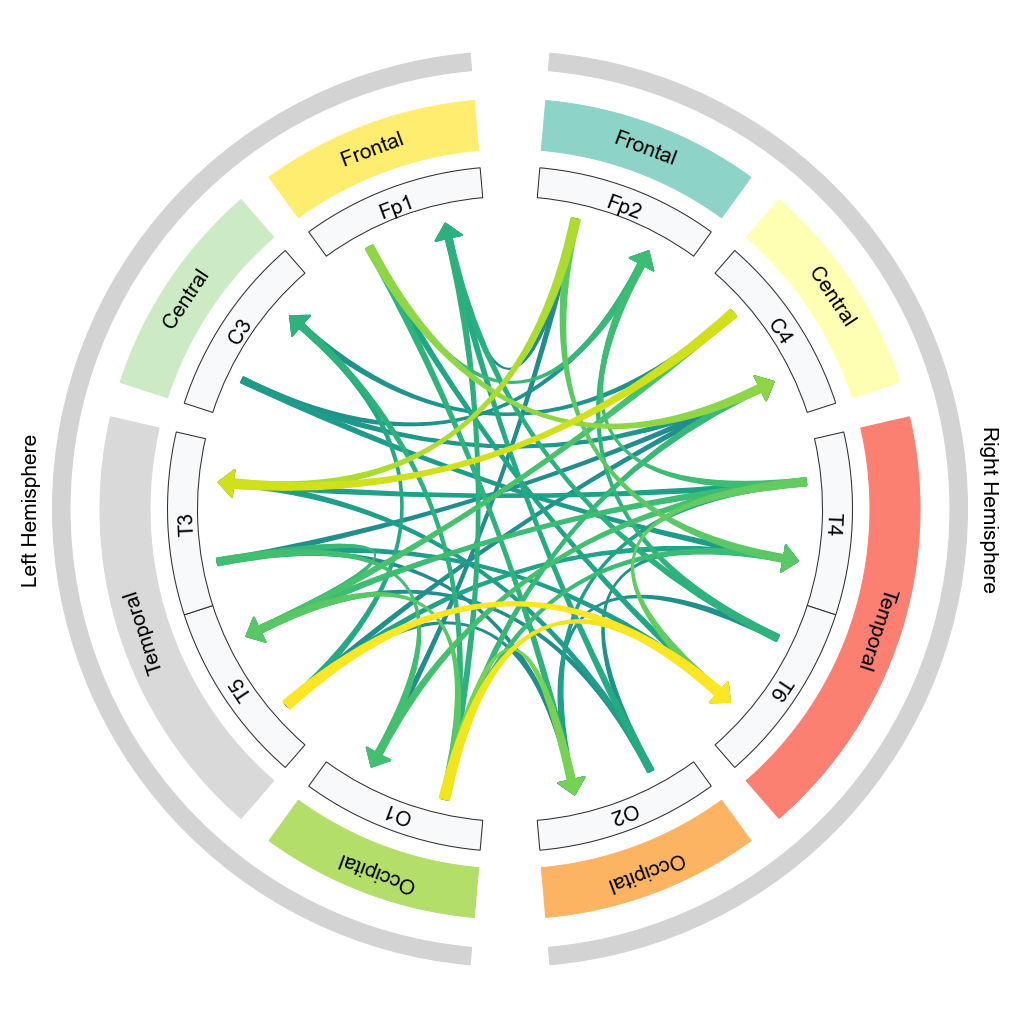

In [73]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold': 0,
    'percentile': [50, 100],
    'normalize_colors': False,
    'arcs_cmap': 'viridis',
})
CircosConnectivity(connectivities_square, channels, areas, **arguments_);

This focuses on stronger, more dominant connections, potentially revealing functional hubs or core communication routes.

**Interpretation**:
By keeping the colormap normalization fixed, this comparative approach offers an unbiased visual contrast between low- and high-strength connectivity distributions.